In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/food-demand-forecasting-data/meal_info.csv
/kaggle/input/food-demand-forecasting-data/fulfilment_center_info.csv
/kaggle/input/food-demand-forecasting-data/Fooddemandmain.csv


In [2]:
import pandas as pd

kelompok7_file = '/kaggle/input/food-demand-forecasting-data/Fooddemandmain.csv'
kelompok7_file = pd.read_csv(kelompok7_file)

In [3]:
kelompok7_file.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [4]:
kelompok7_file.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders'],
      dtype='object')

In [5]:
y = kelompok7_file.num_orders

In [6]:
kelompok7_file_feature = ['week', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'num_orders']

In [7]:
X = kelompok7_file[kelompok7_file_feature]

In [8]:
X.describe()

,week,meal_id,checkout_price,base_price,emailer_for_promotion,num_orders
count,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000
mean,74.768771,2024.337458,332.238933,354.156627,0.081152,261.872760
std,41.524956,547.420920,152.939723,160.715914,0.273069,395.922798
min,1.000000,1062.000000,2.970000,55.350000,0.000000,13.000000
25%,39.000000,1558.000000,228.950000,243.500000,0.000000,54.000000
50%,76.000000,1993.000000,296.820000,310.460000,0.000000,136.000000
75%,111.000000,2539.000000,445.230000,458.870000,0.000000,324.000000
max,145.000000,2956.000000,866.270000,866.270000,1.000000,24299.000000


In [9]:
X.head()

,week,meal_id,checkout_price,base_price,emailer_for_promotion,num_orders
0,1,1885,136.83,152.29,0,177
1,1,1993,136.83,135.83,0,270
2,1,2539,134.86,135.86,0,189
3,1,2139,339.50,437.53,0,54
4,1,2631,243.50,242.50,0,40


In [10]:
from sklearn.tree import DecisionTreeRegressor
kelompok7_file_model = DecisionTreeRegressor(random_state=1)
kelompok7_file_model.fit(X,y)

DecisionTreeRegressor(random_state=1)

In [11]:
print("Making predictions for the food data:")
print(X.head())
print("The predictions are")
print(kelompok7_file_model.predict(X.head()))

Making predictions for the food data:
   week  meal_id  checkout_price  base_price  emailer_for_promotion  \
0     1     1885          136.83      152.29                      0   
1     1     1993          136.83      135.83                      0   
2     1     2539          134.86      135.86                      0   
3     1     2139          339.50      437.53                      0   
4     1     2631          243.50      242.50                      0   

   num_orders  
0         177  
1         270  
2         189  
3          54  
4          40  
The predictions are
[177. 270. 189.  54.  40.]


In [12]:
from sklearn.metrics import mean_absolute_error

predicted_kelompok7 = kelompok7_file_model.predict(X)
mean_absolute_error(y, predicted_kelompok7)

0.0

In [13]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
food_model = DecisionTreeRegressor()
# Fit model
kelompok7_file_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = kelompok7_file_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))


0.025968791890447446


In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)


In [15]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))


Max leaf nodes: 5  		 Mean Absolute Error:  89
Max leaf nodes: 50  		 Mean Absolute Error:  9
Max leaf nodes: 500  		 Mean Absolute Error:  0
Max leaf nodes: 5000  		 Mean Absolute Error:  0


In [16]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
scores = {leaf_size: get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in candidate_max_leaf_nodes}

# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_tree_size = min(scores, key=scores.get)


In [17]:
final_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=1)

# fit the final model and uncomment the next two lines
final_model.fit(X, y)


DecisionTreeRegressor(max_leaf_nodes=500, random_state=1)

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Define the model. Set random_state to 1
rf_model = RandomForestRegressor()

# fit your model
rf_model.fit(train_X, train_y)

# Calculate the mean absolute error of your Random Forest model on the validation data
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

Validation MAE for Random Forest Model: 0.015247903834865375


|--- feature_5 <= 749.50
|   |--- feature_5 <= 263.50
|   |   |--- feature_5 <= 115.00
|   |   |   |--- value: [52.13]
|   |   |--- feature_5 >  115.00
|   |   |   |--- value: [179.98]
|   |--- feature_5 >  263.50
|   |   |--- feature_5 <= 466.00
|   |   |   |--- value: [350.81]
|   |   |--- feature_5 >  466.00
|   |   |   |--- value: [583.84]
|--- feature_5 >  749.50
|   |--- feature_5 <= 2342.50
|   |   |--- feature_5 <= 1316.50
|   |   |   |--- value: [958.26]
|   |   |--- feature_5 >  1316.50
|   |   |   |--- value: [1678.41]
|   |--- feature_5 >  2342.50
|   |   |--- feature_5 <= 5056.50
|   |   |   |--- value: [3100.90]
|   |   |--- feature_5 >  5056.50
|   |   |   |--- value: [7010.52]



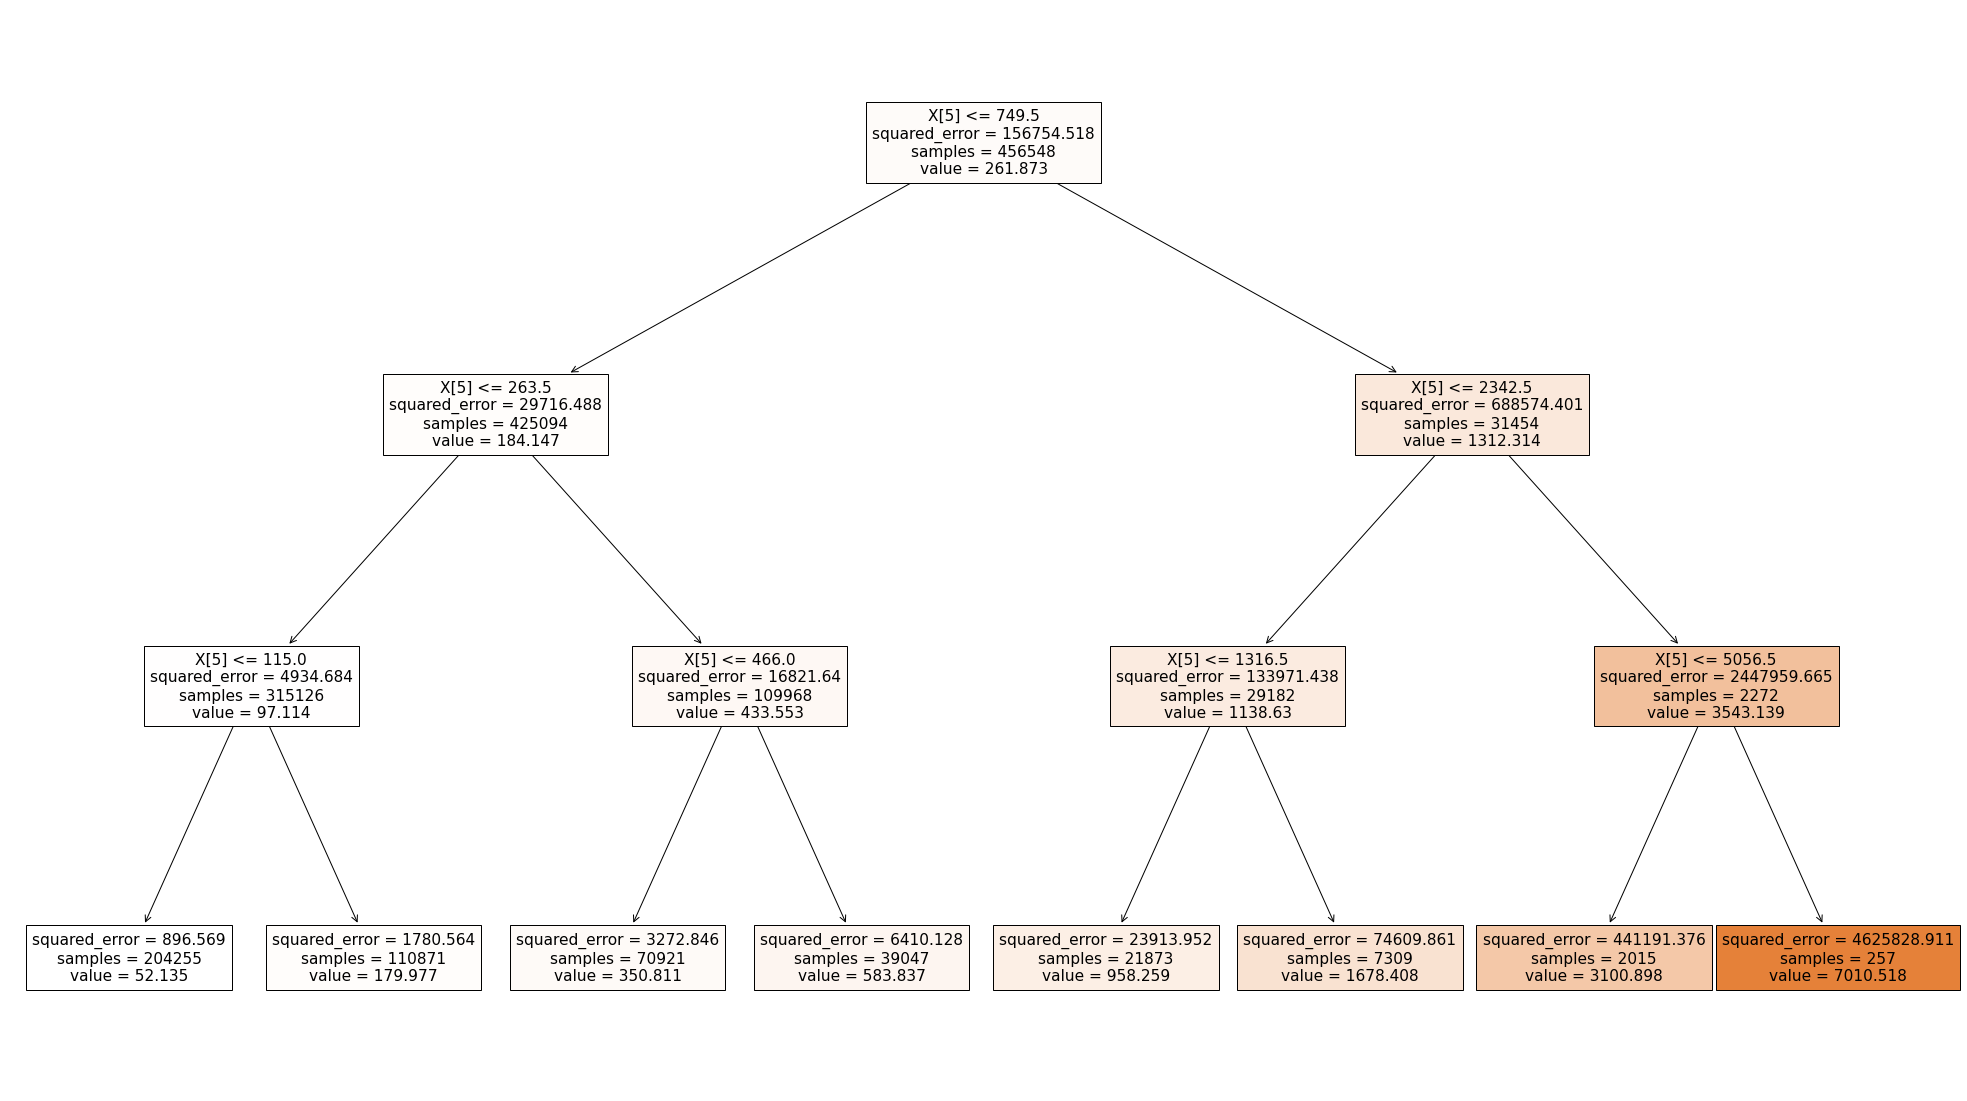

In [19]:
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt # plotting
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X, y)
text_representation = tree.export_text(regr)
print(text_representation)
fig = plt.figure(figsize=(35,20))
_ = tree.plot_tree(regr, filled=True)

In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree


In [21]:
# Prepare the data data
iris = datasets.load_iris()
X = iris.data
y = iris.target


# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)


In [22]:
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_5 <= 749.50
|   |--- feature_5 <= 263.50
|   |   |--- feature_5 <= 115.00
|   |   |   |--- value: [52.13]
|   |   |--- feature_5 >  115.00
|   |   |   |--- value: [179.98]
|   |--- feature_5 >  263.50
|   |   |--- feature_5 <= 466.00
|   |   |   |--- value: [350.81]
|   |   |--- feature_5 >  466.00
|   |   |   |--- value: [583.84]
|--- feature_5 >  749.50
|   |--- feature_5 <= 2342.50
|   |   |--- feature_5 <= 1316.50
|   |   |   |--- value: [958.26]
|   |   |--- feature_5 >  1316.50
|   |   |   |--- value: [1678.41]
|   |--- feature_5 >  2342.50
|   |   |--- feature_5 <= 5056.50
|   |   |   |--- value: [3100.90]
|   |   |--- feature_5 >  5056.50
|   |   |   |--- value: [7010.52]



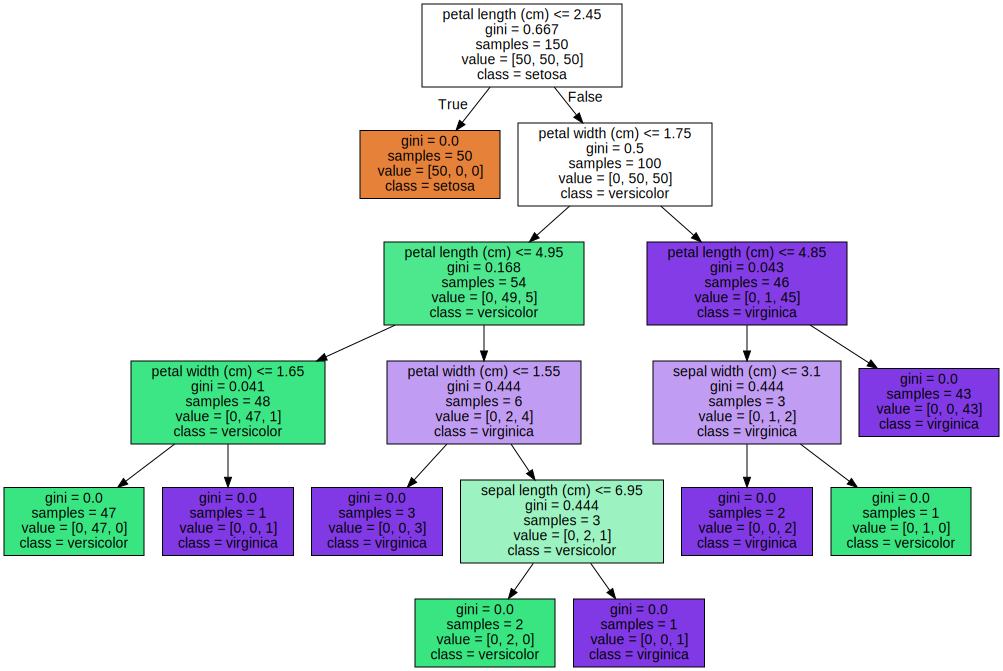

In [23]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


|--- feature_2 <= 2.45
|   |--- value: [0.00]
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- value: [1.02]
|   |   |--- feature_2 >  4.95
|   |   |   |--- value: [1.67]
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- value: [1.67]
|   |   |--- feature_2 >  4.85
|   |   |   |--- value: [2.00]



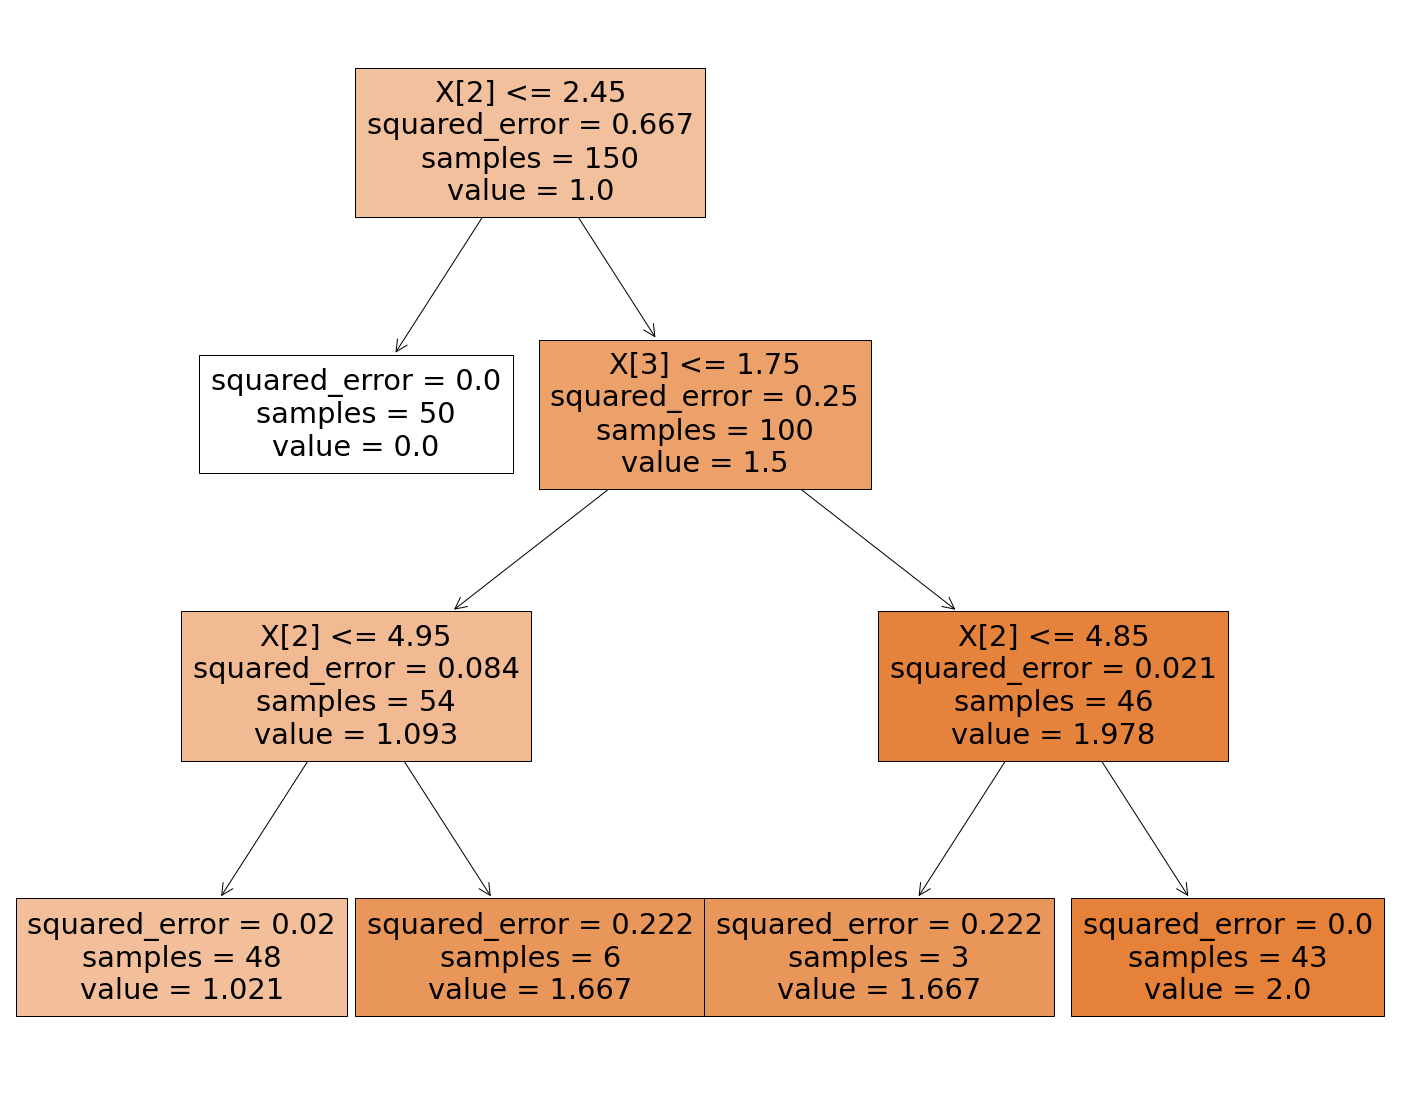

In [24]:
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X, y)

text_representation = tree.export_text(regr)
print(text_representation)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, filled=True)


|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



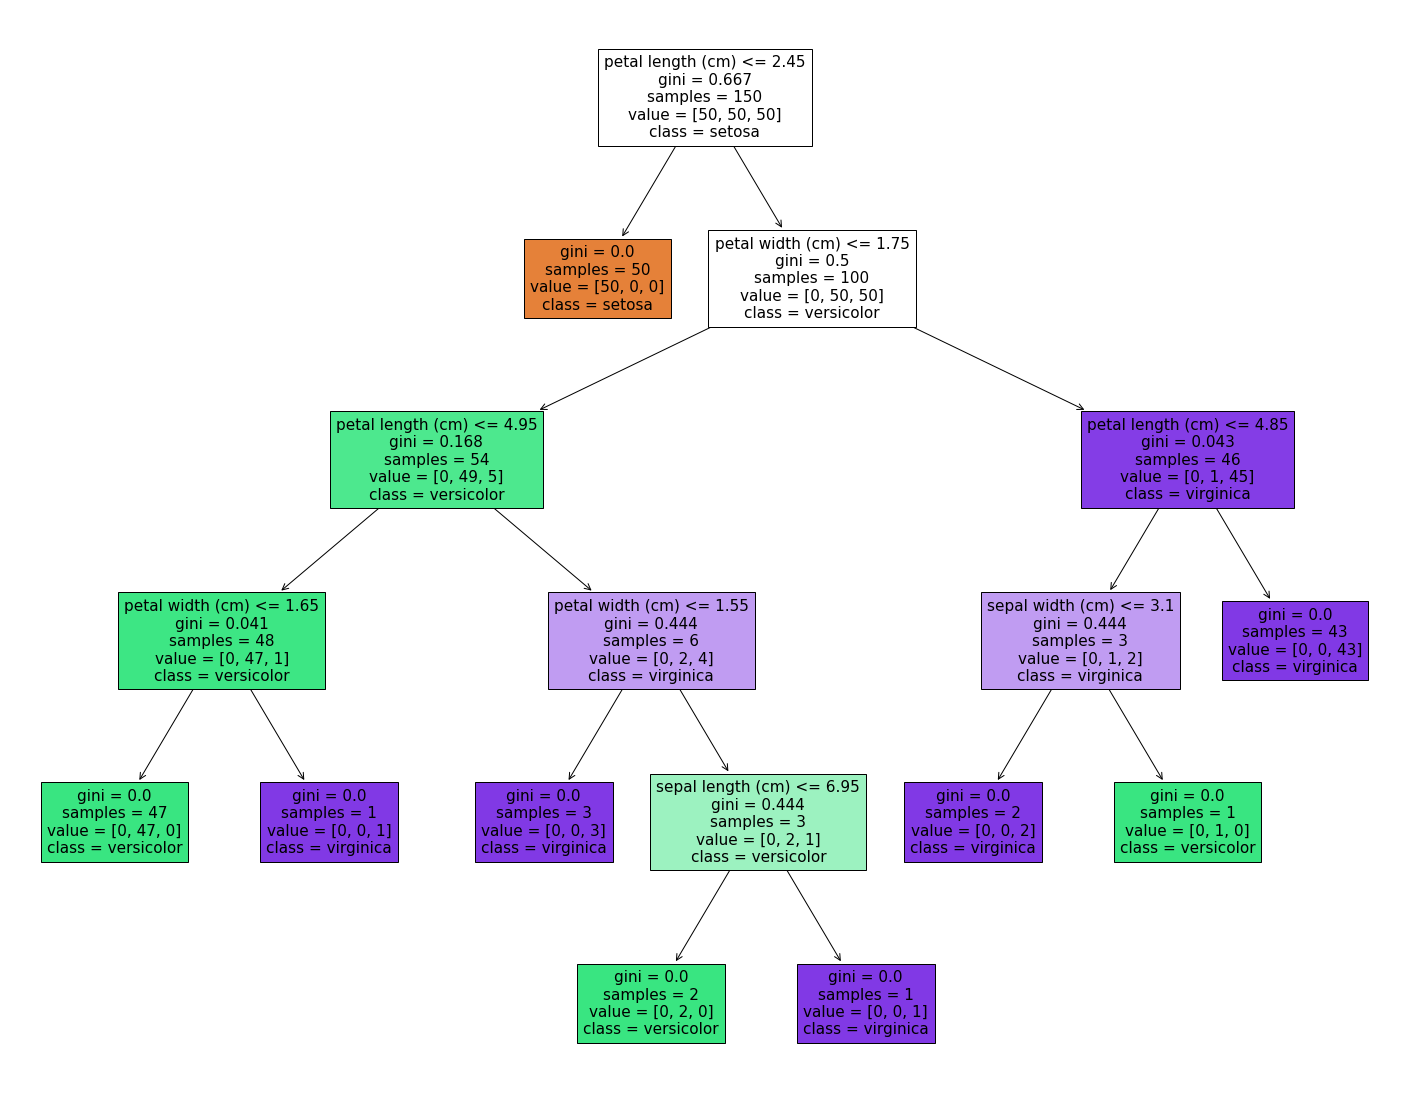

In [25]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import datasets

# Prepare the data data
iris = datasets.load_iris()
X = iris.data
y = iris.target


# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)


text_representation = tree.export_text(clf)
print(text_representation)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)
